In [237]:
 # 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

SyntaxError: invalid syntax (<ipython-input-237-0c095f4913d7>, line 1)

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


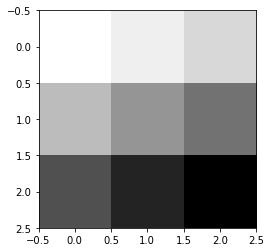

In [7]:
#
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
# 이미지로 보도록 3x3으로 reshape
plt.imshow(image.reshape(3,3), cmap="Greys")
sess.close()

image.shape (1, 7, 7, 1)
w_filter Tensor("Const_6:0", shape=(3, 3, 1, 1), dtype=float32)
conv2d_img.shape (1, 2, 2, 1)
[[162. 216.]
 [540. 594.]]


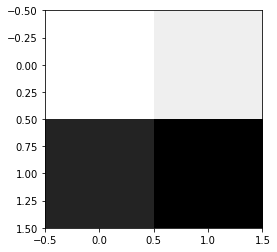

In [24]:
# 그래프 생성
sess= tf.InteractiveSession()

# 이미지 정의
image = np.arange(1,50, dtype=np.float32).reshape(1,7,7,1)
print("image.shape", image.shape)

# 필터 정의
w_filter = tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1)*2)
print("w_filter", w_filter)
# cnn 하이퍼파라미터 정의
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1,3,3,1],padding='VALID')

# cnn 적용
conv2d_img=conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(2,2))

# 이미지화
plt.imshow(conv2d_img.reshape(2,2), cmap="Greys")
sess.close()

image.shape (1, 5, 5, 1)
w_filter Tensor("Const_13:0", shape=(3, 3, 1, 1), dtype=float32)
conv2d_img.shape (1, 3, 3, 1)
[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]
conv2d_same_img.shape (1, 5, 5, 1)
[[4. 6. 6. 6. 4.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [4. 6. 6. 6. 4.]]


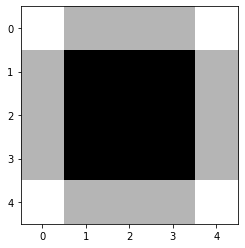

In [33]:
# 그래프 생성
sess= tf.InteractiveSession()

# 이미지 정의
image = np.ones(25, dtype=np.float32).reshape(1,5,5,1)
print("image.shape", image.shape)

# 필터 정의
w_filter = tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1))
print("w_filter", w_filter)
# cnn 하이퍼파라미터 정의
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1,1,1,1],padding='VALID')
conv2d_same = tf.nn.conv2d(input=image, filter=w_filter, strides=[1,1,1,1],padding='SAME')

# cnn 적용
conv2d_img=conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))

conv2d_same_img=conv2d_same.eval()
print("conv2d_same_img.shape", conv2d_same_img.shape)
print(conv2d_same_img.reshape(5,5))
# 이미지화
plt.imshow(conv2d_img.reshape(3,3), cmap="Greys")

plt.imshow(conv2d_same_img.reshape(5,5), cmap="Greys")

sess.close()

In [35]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


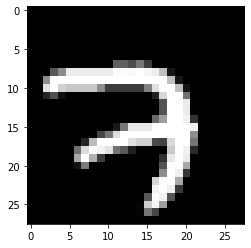

In [37]:
img = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])
plt.imshow(img,cmap='gray')

Tensor("Conv2D_29:0", shape=(1, 14, 14, 5), dtype=float32)
크기 (1, 14, 14, 5)


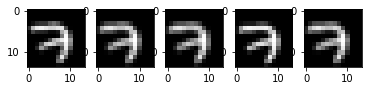

In [53]:
# 그래프 생성
sess=tf.InteractiveSession()

# 이미지 정의
img = img.reshape(1,28,28,1)
# 필터 정의 (범위는 0~1 사이)
w_filter = np.random.random((3,3,1,5))
# cnn 정의
conv2d = tf.nn.conv2d(img,filter=w_filter, strides=[1,2,2,1], padding="SAME")
print(conv2d)
# cnn 실행
conv2d_img= conv2d.eval()
print("크기",conv2d_img.shape)
# 보기 좋게 축 변환
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

# output 5장 시각화
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

# 그래프 종료
sess.close()

Tensor("Conv2D_30:0", shape=(1, 14, 14, 5), dtype=float32)
크기 (1, 14, 14, 5)


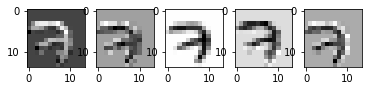

In [54]:
# 그래프 생성
sess=tf.InteractiveSession()

# 이미지 정의
img = img.reshape(1,28,28,1)
# 필터 정의
w_filter = np.random.random((3,3,1,5)) - 0.5 # 범위에 '-'가 생김 (-0.5 < x < 0.5)
# cnn 정의
conv2d = tf.nn.conv2d(img,filter=w_filter, strides=[1,2,2,1], padding="SAME")
print(conv2d)
# cnn 실행
conv2d_img= conv2d.eval()
print("크기",conv2d_img.shape)
# 보기 좋게 축 변환
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

# output 5장 시각화
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

# 그래프 종료
sess.close()

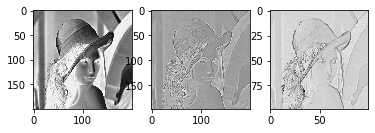

In [71]:
from PIL import Image as Im
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Lena = Im.open('C:/Users/Affinity/Documents/Lena.png')
Lena.size # 이미지 크기 출력
#Lena.show() # 이미지 보기
Lena = Lena.resize((200,200)) # 크기를 200x200
Lena = Lena.convert('L') # 흑백화면으로
Lena= np.array(Lena, dtype= np.float32)
Lena = Lena.reshape(1,200,200,1)
Lena.shape # [1,200,200,1]=[batch,ht,width,channel 수]
K1 = tf.constant([[[[-1.]], [[-1.]], [[-1.]]], 
                  [[[-1.]], [[9.]], [[-1.]]], 
                  [[[-1.]], [[-1.]], [[-1.]]]])
#K1 size= (3,3,1,1)=[ht, width, channel 개수]
a1 = tf.nn.conv2d(Lena, K1, strides=[1,1,1,1], padding="VALID")
sess = tf.Session()
a1= sess.run(a1)
a1.shape # [1,198,198,1]=[channel 수,ht,width,batch]
a1_img= np.swapaxes(a1,0,3)
a1_img.shape # axis0과 3을 서로 바꾸기 => [1,198,198,1]=[batch,ht,width,channel 수]

# 최대값 풀링
h1 = tf.nn.max_pool(a1_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
h1= sess.run(h1)
h1.shape

plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200,200), cmap="Greys")

plt.subplot(1,3,2)
plt.imshow(a1_img.reshape(198,198), cmap="Greys")

plt.subplot(1,3,3)
plt.imshow(h1.reshape(99,99), cmap="Greys")

In [ ]:
K2 = tf.constant([[[[1.]], [[1.]], [[1.]]], 
                  [[[1.]], [[1.]], [[1.]]], 
                  [[[1.]], [[1.]], [[1.]]]])

K3= tf.constant([[[[0.]], [[-1.]], [[0.]]], 
                  [[[-1.]], [[4.]], [[-1.]]], 
                  [[[0.]], [[-1.]], [[0.]]]])
K4= tf.constant([[[[0.]], [[-1.]], [[0.]]], 
                  [[[-1.]], [[5.]], [[-1.]]], 
                  [[[0.]], [[-1.]], [[0.]]]]) 
K5= tf.constant([[[[-2.]], [[-1.]], [[0.]]], 
                  [[[-1.]], [[1.]], [[1.]]], 
                  [[[0.]], [[1.]], [[2.]]]]) 

#K1 size= (3,3,1,1)=[ht, width, channel 개수]
a2 = tf.nn.conv2d(Lena, K2, strides=[1,1,1,1], padding="VALID")
sess = tf.Session()
a2= sess.run(a2)
a2.shape
a2_img= np.swapaxes(a2,0,3)
a2_img.shape # axis0과 3을 서로 바뀨가 => [1,198,198,1]=[batch,ht,width,channel 수]

# 최대값 풀링
h2 = tf.nn.max_pool(a2_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
h2= sess.run(h2)
h2.shape
# 블러
plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200,200), cmap="Greys")

plt.subplot(1,3,2)
plt.imshow(a2_img.reshape(198,198), cmap="Greys")

plt.subplot(1,3,3)
plt.imshow(h2.reshape(99,99), cmap="Greys")


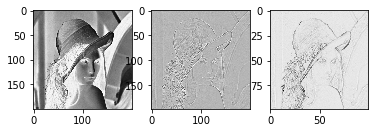

In [83]:
#K1 size= (3,3,1,1)=[ht, width, channel 개수]
a3 = tf.nn.conv2d(Lena, K3, strides=[1,1,1,1], padding="VALID")
sess = tf.Session()
a3= sess.run(a3)
a3_img= np.swapaxes(a3,0,3)
a3_img.shape # axis0과 3을 서로 바뀨가 => [1,198,198,1]=[batch,ht,width,channel 수]

# 최대값 풀링
h3 = tf.nn.max_pool(a3_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
h3 = sess.run(h3)
h3.shape

plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200,200), cmap="Greys")

plt.subplot(1,3,2)
plt.imshow(a3_img.reshape(198,198), cmap="Greys")

plt.subplot(1,3,3)
plt.imshow(h3.reshape(99,99), cmap="Greys")
# 엣지 디텍트

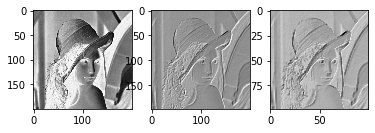

In [85]:
#K1 size= (3,3,1,1)=[ht, width, channel 개수]
a3 = tf.nn.conv2d(Lena, K5, strides=[1,1,1,1], padding="VALID")
sess = tf.Session()
a3= sess.run(a3)
a3_img= np.swapaxes(a3,0,3)
a3_img.shape # axis0과 3을 서로 바뀨가 => [1,198,198,1]=[batch,ht,width,channel 수]

# 최대값 풀링
h3 = tf.nn.max_pool(a3_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
h3 = sess.run(h3)
h3.shape



plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200,200), cmap="Greys")

plt.subplot(1,3,2)
plt.imshow(a3_img.reshape(198,198), cmap="Greys")

plt.subplot(1,3,3)
plt.imshow(h3.reshape(99,99), cmap="Greys")
# 엠보스

In [ ]:
sess=tf.InteractiveSession()

# 이미지 정의
img = np.arange(1,10,dtype=np.float32).reshape(1,3,3,1)

# 필터 정의 (축변환 이용)
w_filter = np.array([1,1,1,1,2,2,2,2,3,3,3,3],dtype=np.float32).reshape(1,3,2,2)
w_filter = np.swapaxes(w_filter,0,2) # (2,3,1,2)
w_filter = np.swapaxes(w_filter,1,3) # (2,2,1,3)

# cnn 정의
conv2d = tf.nn.conv2d(input=img,filter=w_filter, strides=[1,1,1,1], padding="SAME")
print(conv2d)

# cnn 실행
conv2d_img= conv2d.eval()
print("conv2d_img 크기", conv2d_img.shape )
print("conv2d_img " )
print(conv2d_img )

# 보기 좋게 축 변환
conv2d_img = np.swapaxes(conv2d_img, 0, 3).reshape(3,3,3)

print("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)

# 그래프 종료
sess.close()

In [135]:
sess = tf.InteractiveSession()

image = np.arange(1,17, dtype=np.float32).reshape(1,4,4,1)
max_pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
avg_pool = tf.nn.avg_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

print(image)
print(max_pool.eval().shape)
print()
print(max_pool.eval())

print(max_pool.eval().reshape(2,2))
print(avg_pool.eval().reshape(2,2))

[[[[ 1.]
   [ 2.]
   [ 3.]
   [ 4.]]

  [[ 5.]
   [ 6.]
   [ 7.]
   [ 8.]]

  [[ 9.]
   [10.]
   [11.]
   [12.]]

  [[13.]
   [14.]
   [15.]
   [16.]]]]
(1, 2, 2, 1)

[[[[ 6.]
   [ 8.]]

  [[14.]
   [16.]]]]
[[ 6.  8.]
 [14. 16.]]
[[ 3.5  5.5]
 [11.5 13.5]]


# mnist 

In [166]:
tf.reset_default_graph ()


In [4]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph () # 가중치 

tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 8
batch_size = 100

'''
X = tf.placeholder(tf.float32, [None,78*78]) # 78*78이라 하면 에러 남
X_img = tf.reshape(X, [-1,28,28,1])

Y = tf.placeholder(tf.float32, [None,10])
'''

X = tf.placeholder(tf.float32, [None, 784]) # 빈 노드 생성, 유형이랑 크기만 지정
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10]) # 빈 노드 생성
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))

# 단계1
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

# 단계2
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01)) # w1의 결과 32개를 받고, w2는 64개 만들겠다고 선언
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

# 단계2
W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01)) # w1의 결과 32개를 받고, w2는 64개 만들겠다고 선언
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding="SAME")
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")


# 1차원으로 펴기
L3_flat = tf.reshape(L3, [-1, 4*4*128])

# 클래스 10개니까 shape에 10이 들어감.
W4 = tf.get_variable("W4", shape=[4*4*128, 10], 
                     # 학습 반복하면 가중치 객체 이름도 바꿔야 함
                     initializer= tf.contrib.layers.xavier_initializer())

b = tf.Variable(tf.random_normal([10]))

# AX + b
logits = tf.matmul(L3_flat, W4) + b
print(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= logits, labels=Y))
#optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate).minimize(cost)


# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("Learing started.")
 
for epochs in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys} # placeholder에 각각 값을 넣음
        c,_ = sess.run([cost, optimizer], feed_dict=feed_dict) # '_'는 나머지가 나올 부분인데 안 받겠다는 뜻
        avg_cost += c / total_batch
    print("Epochs: ", '%04d' % (epochs + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    # 축이 0이면 한 열에서 최대값의 인덱스 출력
    correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1)) # 두 원소가 같으면 1이 나옴
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("accuracy: ", sess.run(accuracy, feed_dict={X: mnist.test.images, 
                                                  Y: mnist.test.labels}))
print('Learning Finished')
'''
# test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1)) # 두 원소가 같으면 1이 나옴
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("accuracy: ", sess.run(accuracy, feed_dict={X: mnist.test.images, 
                                                  Y: mnist.test.labels}))
'''
# get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Labels: ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("prediction: ", sess.run(tf.argmax(logits,1), feed_dict={X: mnist.test.images[r:r+1]}))

sess.close()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Tensor("add:0", shape=(?, 10), dtype=float32)
Learing started.
Epochs:  0001 cost =  0.838969618
accuracy:  0.9725
Epochs:  0002 cost =  0.069607301
accuracy:  0.9835
Epochs:  0003 cost =  0.044657591
accuracy:  0.988
Epochs:  0004 cost =  0.033125626
accuracy:  0.9917
Epochs:  0005 cost =  0.025584623
accuracy:  0.9894
Epochs:  0006 cost =  0.021182037
accuracy:  0.9857
Epochs:  0007 cost =  0.016998529
accuracy:  0.9907
Epochs:  0008 cost =  0.014135684
accuracy:  0.9939
Learning Finished
Labels:  [9]
prediction:  [9]


# Mnist dropout 활용

In [3]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph () # 가중치 


tf.set_random_seed(777)
# 신경망 모델 구성
X = tf.placeholder(tf.float32,[None,28,28,1])
Y = tf.placeholder(tf.float32,[None,10])
is_training = tf.placeholder(tf.bool)

# W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
#L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
#L1 = tf.nn.relu(L1)
#L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

L1 = tf.layers.conv2d(X,32,[3,3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1,[2,2],[2,2])
L1 = tf.layers.dropout(L1, 0.7, is_training) # 70 버림

L2 = tf.layers.conv2d(L1,64,[3,3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2,[2,2],[2,2])
L2 = tf.layers.dropout(L2, 0.7, is_training) # 70% 버림


L3 = tf.layers.conv2d(L2,128,[3,3], activation=tf.nn.relu)
L3 = tf.layers.max_pooling2d(L3,[2,2],[2,2])
L3 = tf.layers.dropout(L3,0.7, is_training) # 70% 죽임

L4 = tf.contrib.layers.flatten(L3)
L4 = tf.layers.dense(L4,256,activation=tf.nn.relu)
L4 = tf.layers.dropout(L4, 0.5, is_training)

model = tf.layers.dense(L4, 10, activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)

# 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size= 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(8):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1,28,28,1)
        _, cost_val = sess.run([optimizer,cost], feed_dict={X:batch_xs,
                                                           Y: batch_ys, is_training:True})
        total_cost += cost_val
    
    print("Epoch: ", "%04d" % (epoch + 1), 'Avg.cost = ', '{:.4f}'.format(total_cost / total_batch))
    is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print("정확도: ", sess.run(accuracy, feed_dict={X: mnist.test.images.reshape(-1,28,28,1), Y: mnist.test.labels, is_training: False}))

print("최적화 완료")

# 결과 확인

is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도: ", sess.run(accuracy, feed_dict={X: mnist.test.images.reshape(-1,28,28,1), Y: mnist.test.labels, is_training: False}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Epoch:  0001 Avg.cost =  0.7458
정확도:  0.9725
Epoch:  0002 Avg.cost =  0.0926
정확도:  0.9826
Epoch:  0003 Avg.cost =  0.0594
정확도:  0.9736
Epoch:  0004 Avg.cost =  0.0444
정확도:  0.9664
Epoch:  0005 Avg.cost =  0.0336
정확도:  0.9879
Epoch:  0006 Avg.cost =  0.0268
정확도:  0.9825
Epoch:  0007 Avg.cost =  0.0208

In [210]:
a = np.array([1,1,1,1,2,2,2,2,3,3,3,3]).reshape(1,3,2,2)
print(a)
a = np.swapaxes(a, 0,2)
print(a)
a = np.swapaxes(a, 1,3)

[[[[1 1]
   [1 1]]

  [[2 2]
   [2 2]]

  [[3 3]
   [3 3]]]]
[[[[1 1]]

  [[2 2]]

  [[3 3]]]


 [[[1 1]]

  [[2 2]]

  [[3 3]]]]


In [151]:
a

array([[[[1, 2, 3]],

        [[1, 2, 3]]],


       [[[1, 2, 3]],

        [[1, 2, 3]]]])

In [152]:
b = np.array([1,1,1,1,2,2,2,2,3,3,3,3]).reshape(2,2,1,3)

In [153]:
b

array([[[[1, 1, 1]],

        [[1, 2, 2]]],


       [[[2, 2, 3]],

        [[3, 3, 3]]]])

In [165]:
sess = tf.InteractiveSession()

image = np.arange(1,10,dtype=np.float32).reshape(1,3,3,1)
w_filter = np.array([1,1,1,1,2,2,2,2,3,3,3,3]).reshape(1,3,2,2)
w_filter = np.swapaxes(w_filter, 0,2)
w_filter = np.swapaxes(w_filter, 1,3)
conv2d = tf.nn.conv2d(input=image,filter=w_filter, strides=[1,1,1,1], padding="SAME")
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3).reshape(3,3,3)
print(conv2d_img)
sess.close()

[[[12. 16.  9.]
  [24. 28. 15.]
  [15. 17.  9.]]

 [[24. 32. 18.]
  [48. 56. 30.]
  [30. 34. 18.]]

 [[36. 48. 27.]
  [72. 84. 45.]
  [45. 51. 27.]]]


In [162]:
image

array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)

In [163]:
w_filter

array([[[[1, 2, 3]],

        [[1, 2, 3]]],


       [[[1, 2, 3]],

        [[1, 2, 3]]]])

In [13]:
j=[[12, 16, 9.],[24, 28, 15.],[15., 17.,  9.]]
np.argmax(j,0)

NameError: name 'np' is not defined